# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
#Identify potential outliers

numerical_cols=['age','bmi','children','charges'] #Adjust based on your data

for col in numerical_cols:
    if df[col].dtype !='object':
        z = np.abs(stats.zscore(df[col]))
        #Thrareshold for outlieras(adjust as needed,common range:3-4)
        outliers_z = df[col][z >3]
        print(f"Potential outliers in {col} using Z-scores:")
        print(outliers_z.describe())

Potential outliers in age using Z-scores:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: age, dtype: float64
Potential outliers in bmi using Z-scores:
count     4.000000
mean     51.287500
std       1.901813
min      49.060000
25%      50.050000
50%      51.480000
75%      52.717500
max      53.130000
Name: bmi, dtype: float64
Potential outliers in children using Z-scores:
count    18.0
mean      5.0
std       0.0
min       5.0
25%       5.0
50%       5.0
75%       5.0
max       5.0
Name: children, dtype: float64
Potential outliers in charges using Z-scores:
count        7.000000
mean     57696.652167
std       4863.802290
min      51194.559140
25%      53863.115740
50%      58571.074480
75%      61307.136030
max      63770.428010
Name: charges, dtype: float64


In [7]:
def iqr_outliers(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 -q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

outliers_iqr = iqr_outliers('charges')
print(f"Potential outliers in charges using IQR:")
print(outliers_iqr.describe())

Potential outliers in charges using IQR:
              age         bmi    children       charges
count  139.000000  139.000000  139.000000    139.000000
mean    41.079137   35.564604    1.187050  42103.947206
std     13.801420    4.434917    1.126546   5582.168107
min     18.000000   22.895000    0.000000  34617.840650
25%     30.000000   32.667500    0.000000  37786.149950
50%     43.000000   35.200000    1.000000  40974.164900
75%     52.500000   37.660000    2.000000  45786.706425
max     64.000000   52.580000    4.000000  63770.428010


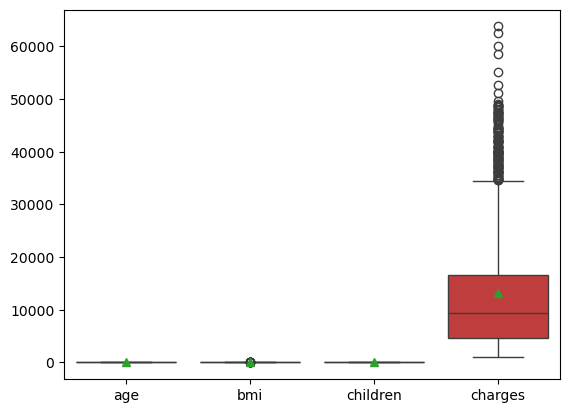

In [9]:
sns.boxplot(data = df.select_dtypes(include = [np.number]),
            orient="v",
            showmeans=True)
plt.show()

In [20]:
def winsorize(col, lower_bound, upper_bound):
    df.loc[df[col] < lower_bound, col] = lower_bound
    df.loc[df[col] > upper_bound, col] = upper_bound
    return df

In [21]:
# calculating IQR for charges

q1 = df['charges'].quantile(0.25)
q3 = df['charges'].quantile(0.75)

IQR= q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

df_winsorize = winsorize('charges', lower_bound, upper_bound)

In [22]:
df_winsorize['charges'].describe()

count     1338.000000
mean     12479.369251
std      10158.056096
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      34489.350562
Name: charges, dtype: float64

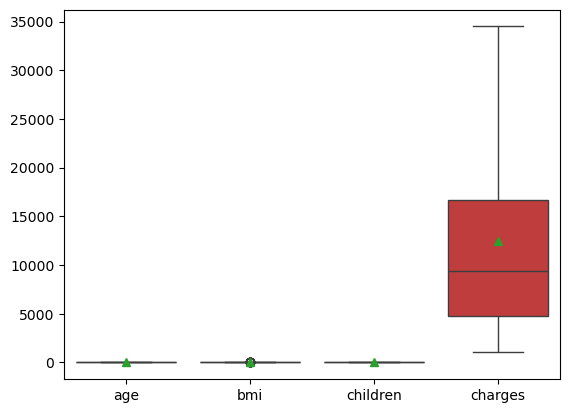

In [23]:
# visualise for outliers using boxplot again

sns.boxplot(data=df.select_dtypes(include=[np.number]),
            orient="v",
            showmeans=True
           )

plt.show()

In [24]:
categorical_cols =['sex','smoker','region']

# create frequency table

for col in categorical_cols:
    print(f"Freguency table for {col}:")
    print(df[col].value_counts())
    print("\n")

Freguency table for sex:
sex
male      676
female    662
Name: count, dtype: int64


Freguency table for smoker:
smoker
no     1064
yes     274
Name: count, dtype: int64


Freguency table for region:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64




In [25]:
print("Additional statistics for categorical variables:")
for col in categorical_cols:
    print(f"{col}:")
    print(df[col].describe(include='all'))
    print("\n")

Additional statistics for categorical variables:
sex:
count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object


smoker:
count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object


region:
count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object




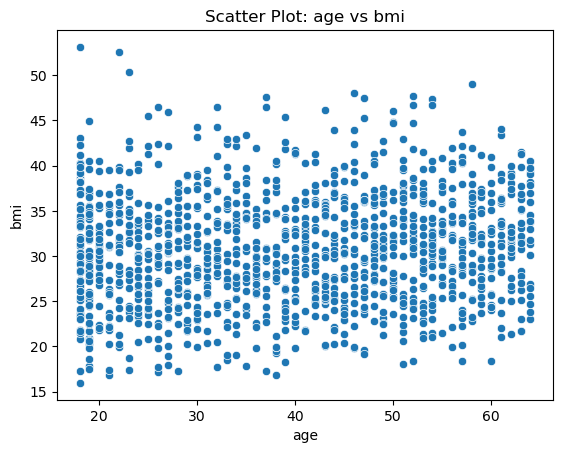

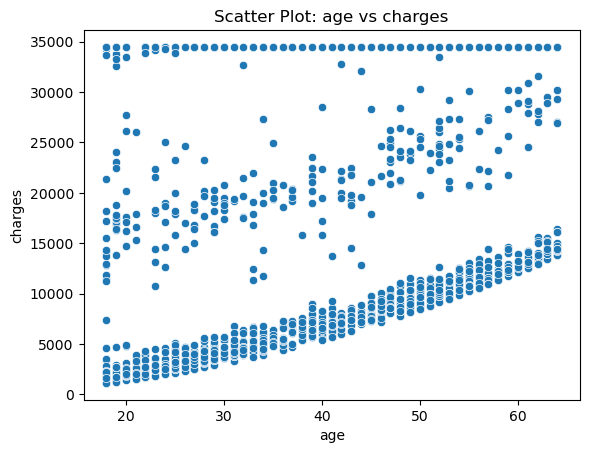

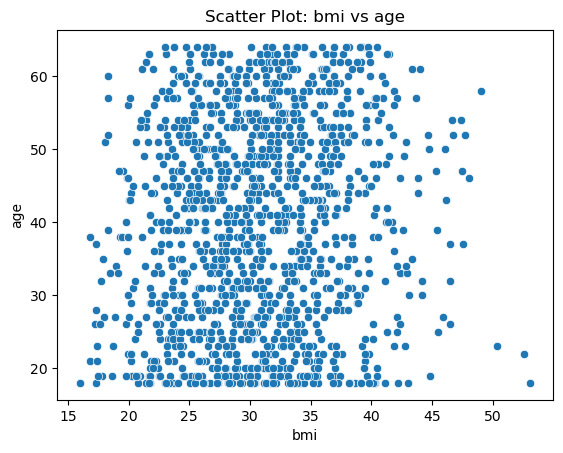

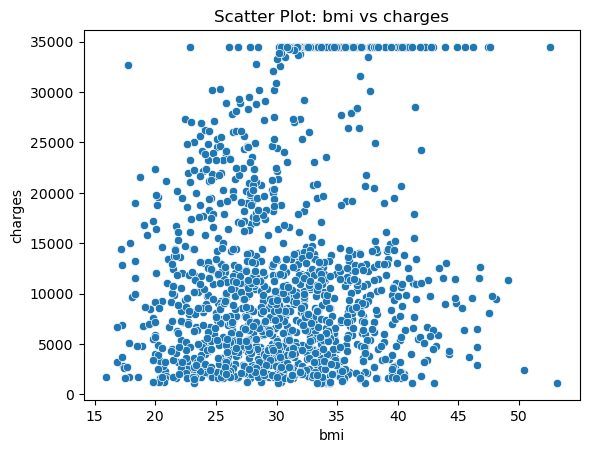

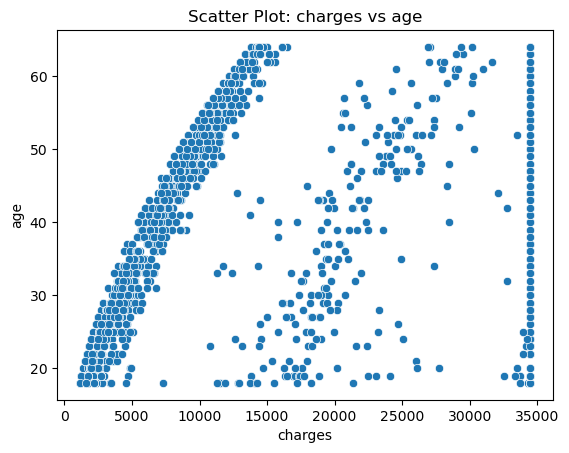

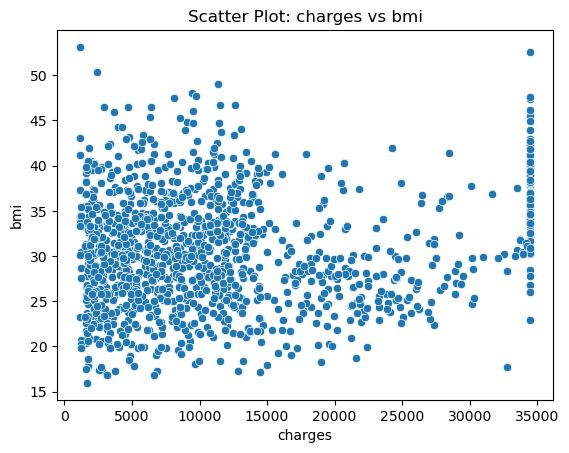

In [35]:
# Select numerical features (adjust as needed)
numerical_cols = ['age', 'bmi', 'charges']

# Scatter plots (consider pairwise combinations)
for col1 in numerical_cols:
  for col2 in numerical_cols:
    if col1 != col2:  # Avoid self-comparisons
      sns.scatterplot(x=col1, y=col2, data=df)
      plt.title(f"Scatter Plot: {col1} vs {col2}")
      plt.show()  # Display each scatter plot

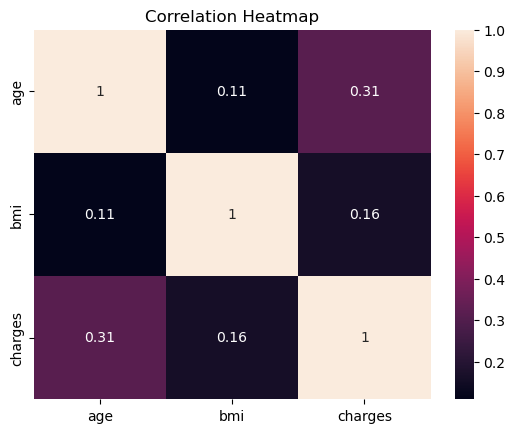

In [39]:
# Heatmap for correlation matrix

corr = df[numerical_cols].corr()
#calculate correlation matrix
sns.heatmap(corr, annot=True) # create heatmap with annotations
plt.title("Correlation Heatmap")
plt.show()

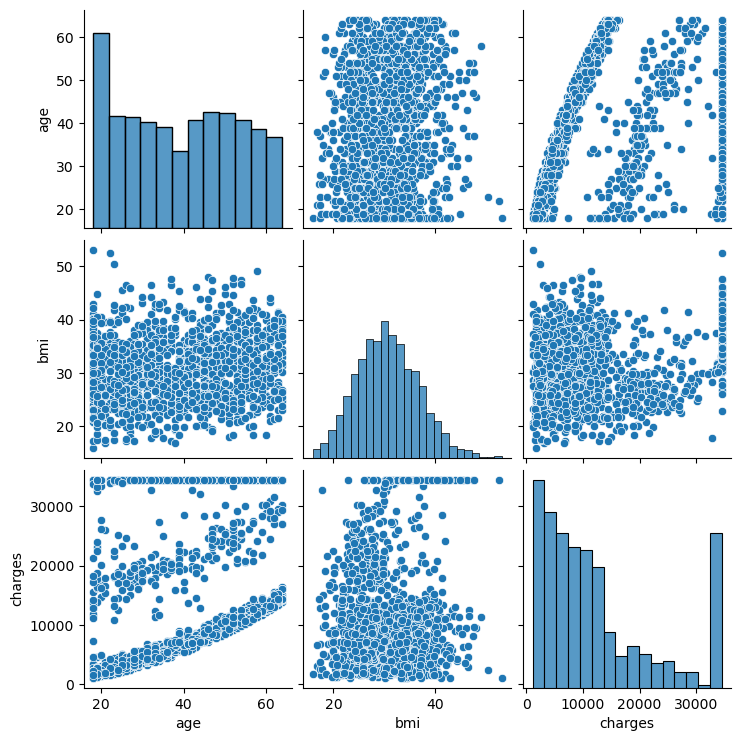

In [40]:
#create pair plot with scatter plots and histograms
sns.pairplot(df[numerical_cols])
plt.show()

It is seen that there is no correlation between any variables but a medium correlation is found between age and charges

##### HYPOTHESIS TESTING

* H0:There is no significant difference in average healthcare charges between younger and older adults
* H1:Average healthcare charges increase with age

In [44]:
import statsmodels.api as sm

n_unique_ages = df['age'].nunique()

#t-test

if n_unique_ages == 2:
    younger_group = df[df['age'] == df['age'].min()]['charges']
    older_group = df[df['age'] == df['age'].max()]['charges']
    tstat,pval = stats.ttest_ind(younger_group, older_group)
    print(f"t-test: t={tstats:4f},p-value={pval:.4f}")
else:
    print("t-test not applicable: More than 2 age groups found.")

t-test not applicable: More than 2 age groups found.


In [47]:
if n_unique_ages >=3:
    model = sm.formula.ols('charges ~ age', data=df).fit()
    anova_table = sm.stats.anova_lm(model)
    print(anova_table)
else:
    print("ANOVA not applicable: Less than 3 age groups found.")

              df        sum_sq       mean_sq           F        PR(>F)
age          1.0  1.354984e+10  1.354984e+10  145.507506  7.054595e-32
Residual  1336.0  1.244100e+11  9.312124e+07         NaN           NaN


sum of squares indicates a large amount of variation in charges explained by the age factor.

A very high F-statistic, suggesting a strong potential difference in charges between groups.

Exteremly small p-value,indicating very strong evidence against the null hypothesis(all age group have equal mean charges).There's likely a significant difference in charges based on age.

##### Gender and Charges

* H0: There is no significant difference in average healthcare charges between men and women.
* H1: Men or women have higher average charges.

In [51]:
# Filter data by gender
male_charges = df[df['sex'] == 'male']['charges']
female_charges = df[df['sex'] == 'female']['charges']

#perform t-test(assuming equal variances)
tstat,pval = stats.ttest_ind(male_charges,female_charges,equal_var=True)
print(f"t-test: t={tstat:.4f},p-value={pval:.4f}")

t-test: t=1.9151,p-value=0.0557


There's not enough evidencce to reject the null hypothesis at a common significance level of 0.05(or 5%).In other word,based on the data you analyze,we cannot statistically conclude that the average insurance charges differ between males and females

##### BMI and Charges

* H0:There is no signifancant correlation bnetween BMI and healthcare charges.
* H1:Higher BMI is associated with higher charges

In [53]:
# calculate pearsons's correlation co-efficient
correlation,p_value = stats.pearsonr(df['charges'],df['bmi'])
print(f"Pearson's coreelation co-efficent: {correlation:.4f}")
print(f"p-value: {p_value:4f}")

Pearson's coreelation co-efficent: 0.1602
p-value: 0.000000


This indicates a week correlation bewteen bmiand charges.

There's a statistically significant, but weak,negative correlation between the variance.This means that there might be a slight tendency for one variable to decrease as the otherincreases,but the strength of this association is weak.The coefficent value of -0.0730 suggest a very minimal negative effect.

#### Smoking and Charges

* H0:Smoking status has no significant impact on healthcare charges.
* H1:Smokers have higher average charges.

In [55]:
#Filter data by smoking status
smoker_charges = df[df['smoker'] == 'yes']['charges']
non_smoker_charges = df[df['smoker'] == 'no']['charges']
#perform t-test(assuming equal variances
tstats,pval = stats.ttest_ind(smoker_charges,non_smoker_charges,equal_var=True)
print(f"t-test: t={tstats:.4f},p-value={pval:.4f}")

t-test: t=46.4641,p-value=0.0000


Based on the t-test result,we can conclude that there's a staitistically difference in insurance charges between smoker and non-smokers.The postive t-statistic suggest that, on average, smoker likely have higher insurance charges comparied to non-smokers.

#### Region and Charges

* H0:There is no significant difference in average healthcare charges across different regions.
* H1:healthcare charges vary significantly between regions.

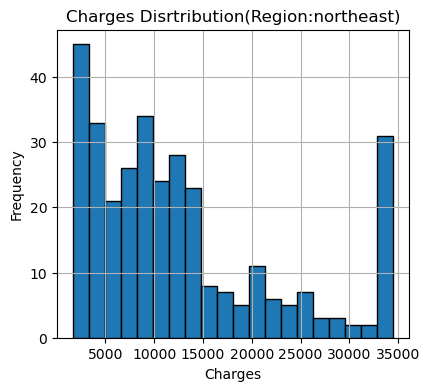

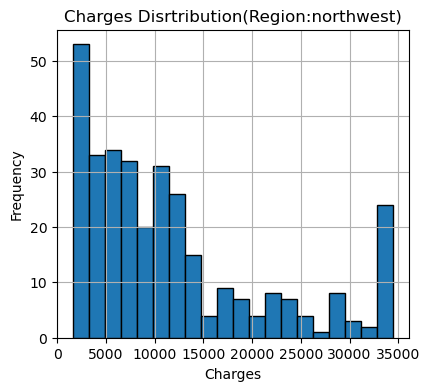

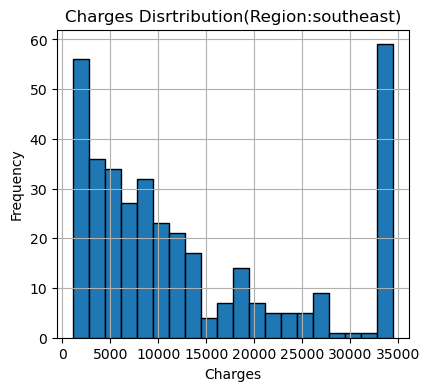

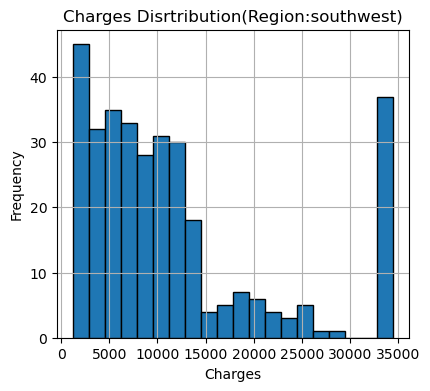

In [60]:
#check for normnality
#Group data by region

grouped_by_region = df.groupby('region')
#visual Inspection(Histogram and Q-Q plot for each region)
for region,group_data in grouped_by_region:
    plt.figure(figsize=(10,4))
    #Histrogram
    plt.subplot(1 ,2 ,1)
    group_data['charges'].hist(bins=20,edgecolor='black')
    plt.title(f"Charges Disrtribution(Region:{region})")
    plt.xlabel("Charges")
    plt.ylabel("Frequency")

In [64]:
#statistical Test (Shapiro-walk test for each region)
for region, group_data in grouped_by_region:
    shapiro_walk_stat, pval = stats.shapiro(group_data['charges'])
    print(f"Region:{region} - Shapiro-walk Test Statistic:{shapiro_walk_stat:.4f}, p-value: {pval:.4f}")

Region:northeast - Shapiro-walk Test Statistic:0.8631, p-value: 0.0000
Region:northwest - Shapiro-walk Test Statistic:0.8478, p-value: 0.0000
Region:southeast - Shapiro-walk Test Statistic:0.8364, p-value: 0.0000
Region:southwest - Shapiro-walk Test Statistic:0.8132, p-value: 0.0000


Since all regions have p-values much lower than the common significance level of 0.05,it's safe to conclude that the "charges" variable is not normally distributed across all regions.

This finding indicates that using ANOVA to compare charges across regions might not be appropriate. ANOVA relies on the assumption of normality of residuals,which is likely violated here. A more suitable test be the kruskal-Wallis test, a non-parametric test that does not require normality assumptions.

In [72]:
def check_and_fix_charges(data_by_region):
  # Get the expected length of the charges list based on any existing region
  expected_len = len(next(iter(data_by_region.values())))  # Get length from any region's charges
 # Loop through regions and fix charges if needed
  for region, charges in data_by_region.items():
    if len(charges) != expected_len:
        data_by_region[region] = charges + [0] * (expected_len - len(charges))  # Pad with zeros
        return data_by_region

# Group data by region
grouped_by_region = df.groupby('region')

# Extract charges for each region (assuming 'charges' is the column name)
charges_by_region = {region: group_data['charges'].tolist() for region, group_data in grouped_by_region}

# Fix charges if necessary to ensure consistent shape
charges_by_region = check_and_fix_charges(charges_by_region.copy())  # Pass a copy to avoid modifying original dict

# Perform Kruskal-Wallis test
hstat, pval = stats.kruskal(*charges_by_region.values())
print(f"Kruskal-Wallis test: H={hstat:.4f}, p-value={pval:.4f}")

# Optional: Analyze results (e.g., print interpretation based on p-value)
if pval < 0.05:
  print("Reject null hypothesis: There's a statistically significant difference in charges across regions.")
else:
  print("Fail to reject null hypothesis: No significant difference detected.")

Kruskal-Wallis test: H=4.6617, p-value=0.1983
Fail to reject null hypothesis: No significant difference detected.


#### Children and Charges

* H0: The number of children has no significant effect on healthcare charges.

* H1: More children lead to higher charges.

In [74]:
model = sm.formula.ols('charges ~ children',data=df).fit()
anova_table=sm.stats.anova_lm(model)
print(anova_table)

              df        sum_sq       mean_sq         F    PR(>F)
children     1.0  7.366765e+08  7.366765e+08  7.172258  0.007495
Residual  1336.0  1.372231e+11  1.027119e+08       NaN       NaN


This very low p-value (less than 0.05, commonly used as a significance threshold) indicates that the observed difference in charges based on the number of children is unlikely to be due to chance. In other words, there's statistically significant evidence to suggest that the number of children has an impact on insurance charges.

The analysis demonstrates that the number of children can be a statistically significant factor influencing insurance charges in some regions. Further investigation, such as post-hoc tests, might be necessary to identify specific groups with statistically different charges. It's also important to consider other factors that could influence charges alongside the number of children.